In [1]:
#%% Importando os pacotes necessários
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go

In [2]:
# Importando o banco de dados
perfil = pd.read_excel("/Users/administrador/Documents/usp_ds_analytics/usp_ds_analytics/anacor_mca/data/perfil_aplicacao_civil.xlsx")

In [3]:
perfil.head()

,estudante,perfil,aplicacao,estado.civil
0,Gabriela,Conservador,Poupanca,Casado
1,Luiz Felipe,Conservador,Poupanca,Casado
2,Patrícia,Conservador,Poupanca,Casado
3,Gustavo,Conservador,Poupanca,Solteiro
4,Letícia,Conservador,Poupanca,Casado


Agora temos uma terceira variável para analisar? estado.civil.

Será que esta nova se associa com as demais categorias?

In [4]:
# Criando um novo banco de dados com as variáveis para a MCA
dados_mca = perfil.drop(columns=['estudante'])

In [5]:
# Informações descritivas sobre as variáveis
print(dados_mca['perfil'].value_counts())
print("")
print(dados_mca['aplicacao'].value_counts())
print("")
print(dados_mca['estado.civil'].value_counts())

perfil
Agressivo      58
Moderado       25
Conservador    17
Name: count, dtype: int64

aplicacao
Acoes       45
CDB         40
Poupanca    15
Name: count, dtype: int64

estado.civil
Solteiro    57
Casado      43
Name: count, dtype: int64


### Criando a tabela de contingência
Lembrando que elas são sempre para pares de variáveis.

Para mais de 2 variáveis, existem 2 métodos, com uma matriz auxiliar: 

**Matriz binária Z**
- coordenadas-padrão, transformo as observações em dummies para cada categoria.
- aqui a quantidade de dimensões é definido por J - Q, onde J é a quantidade total de categorias em todas as variáveis Q no mapa perceptual dessa matriz
- Inércia Principal Total = J - Q / Q

**Matriz de Burt**
- B = Z'* Z
- É possível combinar em uma única matriz o cruzamento de todos os pares variáveis
e suas categorias, obtendo, desta forma, uma matriz que contém as frequências
absolutas observadas para todos os cruzamentos
- Ao considerar a matriz de Burt como uma tabela de contingência, é possível realizar
uma Anacor e obter as coordenadas das categorias das variáveis

In [6]:
# Tabela de contingência para todos os pares
tabela_mca_1 = pd.crosstab(dados_mca["perfil"], dados_mca["aplicacao"])
print(tabela_mca_1)
print("")
tabela_mca_2 = pd.crosstab(dados_mca["perfil"], dados_mca["estado.civil"])
print(tabela_mca_2)
print("")
tabela_mca_3 = pd.crosstab(dados_mca["aplicacao"], dados_mca["estado.civil"])
print(tabela_mca_3)
print("")

aplicacao    Acoes  CDB  Poupanca
perfil                           
Agressivo       36   20         2
Conservador      5    4         8
Moderado         4   16         5

estado.civil  Casado  Solteiro
perfil                        
Agressivo         17        41
Conservador       12         5
Moderado          14        11

estado.civil  Casado  Solteiro
aplicacao                     
Acoes              9        36
CDB               24        16
Poupanca          10         5



### Analisando a significância estatística da associação (teste qui²)
Avaliamos para os pares de variáveis, se não apresentar uma associação estatisticamente significante, nem entra no mapa perceptual.

In [7]:
tab_1 = chi2_contingency(tabela_mca_1)
print(f"estatística qui²: {round(tab_1[0], 2)}")
print(f"p-valor da estatística: {round(tab_1[1], 4)}")
print(f"graus de liberdade: {tab_1[2]}")
print("")
tab_2 = chi2_contingency(tabela_mca_2)
print(f"estatística qui²: {round(tab_2[0], 2)}")
print(f"p-valor da estatística: {round(tab_2[1], 4)}")
print(f"graus de liberdade: {tab_2[2]}")
print("")
tab_3 = chi2_contingency(tabela_mca_3)
print(f"estatística qui²: {round(tab_3[0], 2)}")
print(f"p-valor da estatística: {round(tab_3[1], 4)}")
print(f"graus de liberdade: {tab_3[2]}")

estatística qui²: 31.76
p-valor da estatística: 0.0
graus de liberdade: 4

estatística qui²: 11.44
p-valor da estatística: 0.0033
graus de liberdade: 2

estatística qui²: 17.86
p-valor da estatística: 0.0001
graus de liberdade: 2


Como teste de hipótese, eu posso olhar direto para o p-value da estatística. Ele mostra se é estatisticamente significativo e se podemos rejeitar H0 (não existe associação significativa entre as variáveis).

O teste chi2 apenas mostra se existe uma associação, porém ainda não sabemos de onde vem essa associação, quais categorias envolvem isso. 

## Elaborando a MCA

In [8]:
# Na função, o input é a tabela com os dados das variáveis
mca = prince.MCA(n_components=2).fit(dados_mca)

### Quantidade de dimensões
Igual total de categorias - qtde de variáveis

In [11]:
# Quantidade total de categorias
mca.J_

8

In [12]:
# Quantidade de variáveis na análise
mca.K_

3

In [14]:
# Quantidade de dimensões
quant_dim = mca.J_ - mca.K_
quant_dim

5

### Visualizando matrizes: binária e Burt

In [15]:
binaria = pd.get_dummies(dados_mca, columns=dados_mca.columns, dtype=float)

In [17]:
binaria

,perfil_Agressivo,perfil_Conservador,perfil_Moderado,aplicacao_Acoes,aplicacao_CDB,aplicacao_Poupanca,estado.civil_Casado,estado.civil_Solteiro
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
97,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
98,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [19]:
burt = np.matmul(np.transpose(binaria), binaria) # multiplicação de matrizes

In [20]:
burt

,perfil_Agressivo,perfil_Conservador,perfil_Moderado,aplicacao_Acoes,aplicacao_CDB,aplicacao_Poupanca,estado.civil_Casado,estado.civil_Solteiro
perfil_Agressivo,58.0,0.0,0.0,36.0,20.0,2.0,17.0,41.0
perfil_Conservador,0.0,17.0,0.0,5.0,4.0,8.0,12.0,5.0
perfil_Moderado,0.0,0.0,25.0,4.0,16.0,5.0,14.0,11.0
aplicacao_Acoes,36.0,5.0,4.0,45.0,0.0,0.0,9.0,36.0
aplicacao_CDB,20.0,4.0,16.0,0.0,40.0,0.0,24.0,16.0
aplicacao_Poupanca,2.0,8.0,5.0,0.0,0.0,15.0,10.0,5.0
estado.civil_Casado,17.0,12.0,14.0,9.0,24.0,10.0,43.0,0.0
estado.civil_Solteiro,41.0,5.0,11.0,36.0,16.0,5.0,0.0,57.0


Na matriz Burt tenho todas as variáveis e categorias em linha e coluna

### Obtendo os eigenvalues (autovalores)

In [21]:
tabela_autovalores = mca.eigenvalues_summary
print(tabela_autovalores)
# São gerados 'm' autovalores: m = mín(I-1,J-1)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.602        36.14%                     36.14%
1              0.436        26.16%                     62.30%


Os eigenvalues representam as inércias parciais de cada dimensão.

- Eixo X: 0 (36.14% )
- Eixo Y: 1 (26.16%)

- O primeiro autovalor é sempre maior que os demais.
- O valor do acumulado mostra se houve e quanto tivemos de perda.

### Obtendo a inércia principal total

In [22]:
# É a soma dos eigenvalues (também é a divisão: estat. qui² / N)
# Quanto maior a inércia principal total, maior é a associação entre categorias
print(mca.total_inertia_)

1.6666666666666645


### Obtendo as coordenadas do mapa perceptual

In [24]:
# Coordenadas principais das categorias das variáveis
coord_burt = mca.column_coordinates(dados_mca)
coord_burt

,0,1
perfil_Agressivo,-0.653069,-0.014732
perfil_Conservador,1.129970,1.483614
perfil_Moderado,0.746741,-0.974679
aplicacao_Acoes,-0.831258,0.387515
aplicacao_CDB,0.417184,-0.935143
aplicacao_Poupanca,1.381285,1.331169
estado.civil_Casado,0.843172,-0.131145
estado.civil_Solteiro,-0.636077,0.098934


In [25]:
# Obtendo as coordenadas-padrão das categorias das vaiáveis
coord_padrao = mca.column_coordinates(dados_mca)/np.sqrt(mca.eigenvalues_)
coord_padrao

,0,1
perfil_Agressivo,-0.841494,-0.022312
perfil_Conservador,1.455992,2.246900
perfil_Moderado,0.962193,-1.476129
aplicacao_Acoes,-1.071095,0.586883
aplicacao_CDB,0.537550,-1.416253
aplicacao_Poupanca,1.779816,2.016026
estado.civil_Casado,1.086446,-0.198617
estado.civil_Solteiro,-0.819599,0.149834


Em termos de resultados, posso escolher uma das duas, geralmente elas são semelhantes, mudando pouco os eixos.

Vamos então seguir com as coordenadas-padrao (para as observações tbm).

### Obtendo as coordenadas das observações do banco de dados

In [26]:
# Na função, as coordenadas das observações vêm das coordenadas-padrão

coord_obs = mca.row_coordinates(dados_mca)
coord_obs

,0,1
0,1.440751,1.354770
1,1.440751,1.354770
2,1.440751,1.354770
3,0.805403,1.470920
4,1.440751,1.354770
...,...,...
95,-0.910729,0.238135
96,-0.910729,0.238135
97,-0.910729,0.238135
98,-0.910729,0.238135


### Plotando o mapa percentual (coordanadas-padrao)

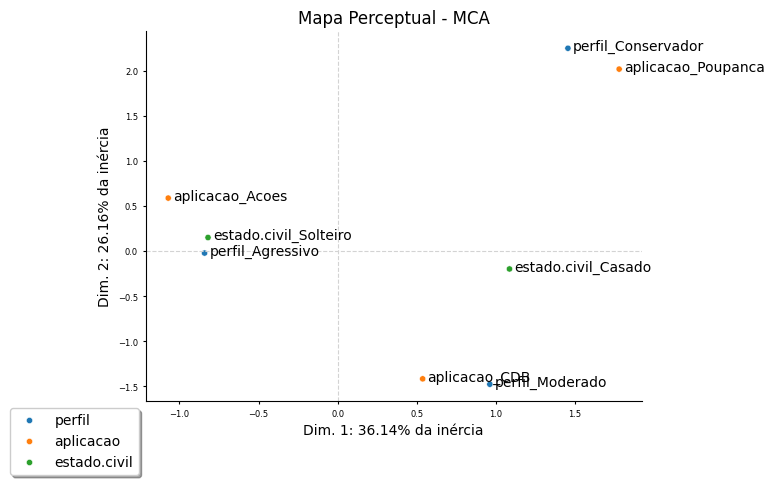

In [31]:
chart = coord_padrao.reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])
# Nota: para a função acima ser executada adequadamente, não deixar underline no nome original da variável no dataset!

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variavel': var_chart})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=10)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['categoria'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variavel', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(0,0), fancybox=True, shadow=True, fontsize = '10')
plt.title("Mapa Perceptual - MCA", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=10)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=10)
plt.show()

Categorias que estão próximas, são aquelas que estão associadas.
É uma análise por proximidade.

Nós partimos de variáveis categóricas para variáveis métricas (posição x, y), sem poderação arbitrária!